# Warshall vs Naive method for Transitive Closure

### Import the required libraries

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

### Warshall Algorithm to compute transitive closure

In [2]:
def warshallAlgorithm(adjMatrix, order):    
    adjMatrixTC = adjMatrix
    for k in range(order):
        for i in range(order):
            for j in range(order):
                adjMatrixTC[i][j] = adjMatrixTC[i][j] or (adjMatrixTC[i][k] and adjMatrixTC[k][j])
    
    return adjMatrixTC

### Naive Algorithm to compute transitive closure

In [3]:
def naiveAlgorithm(adjMatrix, order):
    adjMatrixK = adjMatrix.copy()
    adjMatrixTC = adjMatrix.copy()
    for k in range(1, order):
        adjMatrixKTmp = np.zeros([order, order], dtype=int)
        for i in range(order):
            for j in range(order):                
                for l in range(order):
                    adjMatrixKTmp[i][j] = adjMatrixKTmp[i][j] or (adjMatrixK[i][l] and adjMatrix[l][j])
                adjMatrixTC[i][j] = adjMatrixTC[i][j] or adjMatrixKTmp[i][j]
        adjMatrixK = adjMatrixKTmp.copy()
                
    return adjMatrixTC

In [4]:
def multiply_matrix(mat_x, mat_y):
    mat_size = (mat_x.shape[0], mat_y.shape[1])
    result = np.zeros(mat_size)
    # iterating rows of mat_X
    for i in range(0, mat_x.shape[0]):
        # iterating columns of mat_Y
        for j in range(0, mat_y.shape[1]):
            # iterating rows of mat_Y
            for k in range(0, mat_y.shape[0]):
                result[i][j] = 1 if result[i][j] + (mat_x[i][k] * mat_y[k][j]) >= 1 else 0
    return result

In [15]:
def naiveAlgorithm(mat, order):
    temp = mat
    order = mat.shape[0]
    temp2 = np.zeros(order)
    temp3 = np.zeros(order)
    for i in range(2, order+1):
        if i % 2 == 0:
            temp2 = multiply_matrix(mat, temp)
        else:
            temp3 = multiply_matrix(mat, multiply_matrix(mat, temp))
    temp = temp + temp2 + temp3
    temp[temp >= 1] = 1
    return temp

In [16]:
mat_order_range = (10, 101)

### Begin of code execution

In [17]:
timeNaive, timeWarshall = [], []
for i in range(10, 101):
    print(f"Matrix Order: {str(i)}")
    adjMatrix = np.random.choice([0,1], [i, i])
        
    start = time.perf_counter()
    x1 = naiveAlgorithm(adjMatrix, i)
    timeNaive.append(time.perf_counter() - start)
    print(time.perf_counter() - start)
    
    start = time.perf_counter()
    x2 = warshallAlgorithm(adjMatrix, i)
    timeWarshall.append(time.perf_counter() - start)
    print(time.perf_counter() - start)
    
    print(f"============================")

Matrix Order: 10
0.04629970000007688
0.0010594999999966603
Matrix Order: 11
0.06026869999993778
0.001406200000019453
Matrix Order: 12
0.065051799999992
0.0010475000000269574
Matrix Order: 13
0.1207856000000902
0.0021596000000272397
Matrix Order: 14
0.1984879000000319
0.0027232999999569074
Matrix Order: 15
0.22662139999999908
0.0030744000000595406
Matrix Order: 16
0.21261920000006285
0.002272899999979927
Matrix Order: 17
0.26452819999997246
0.002382299999908355
Matrix Order: 18
0.399413299999992
0.004399199999966186
Matrix Order: 19
0.4715154000000439
0.0033874000000650994
Matrix Order: 20
0.7056817000000137
0.0038426999999501277
Matrix Order: 21
0.7211423999999624
0.007337600000028033
Matrix Order: 22
0.6876512999999704
0.005304700000010598
Matrix Order: 23
0.9247556000000259
0.0069753999999875305
Matrix Order: 24
1.6819835999999668
0.01421549999997751
Matrix Order: 25
1.5375814999999875
0.011762699999962933
Matrix Order: 26
1.5520631000000549
0.010250899999959984
Matrix Order: 27
3.19

### Plot the time execution graph

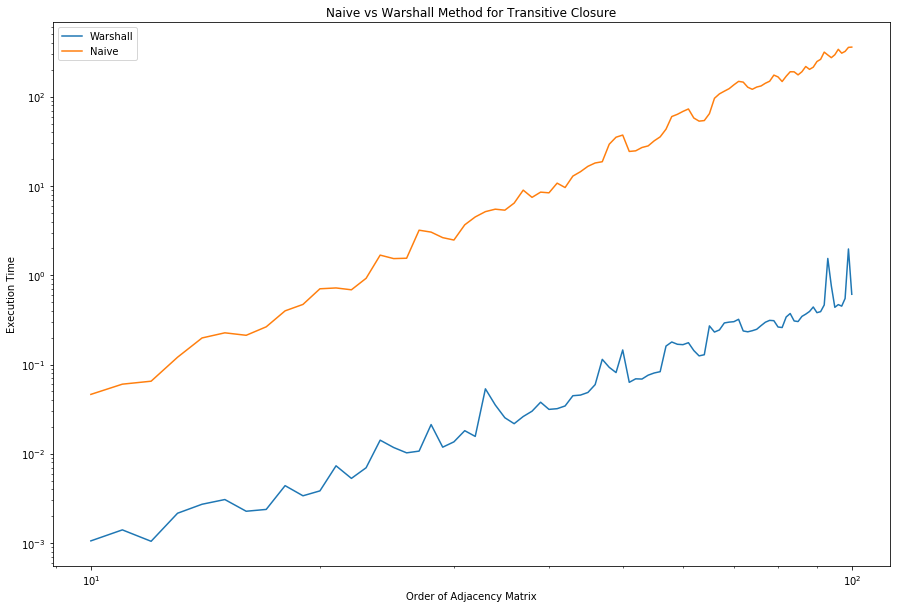

In [18]:
plt.figure(figsize=(15,10))
plt.title("Naive vs Warshall Method for Transitive Closure")
plt.loglog(np.arange(mat_order_range[0], mat_order_range[1]), timeWarshall, label = "Warshall")
plt.loglog(np.arange(mat_order_range[0], mat_order_range[1]), timeNaive, label = "Naive")
plt.xlabel("Order of Adjacency Matrix")
plt.ylabel("Execution Time")
plt.legend()
plt.show()

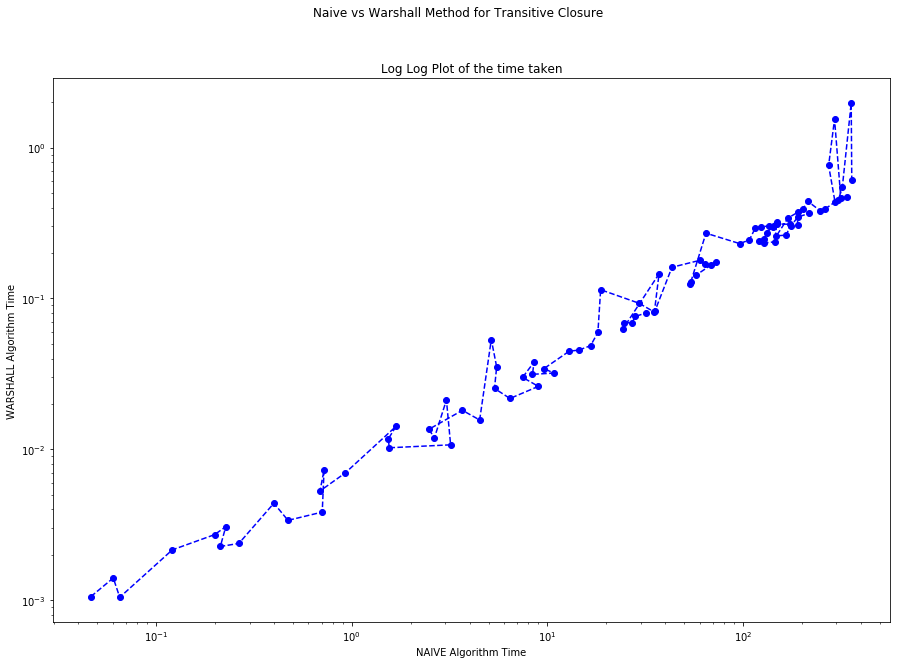

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle("Naive vs Warshall Method for Transitive Closure")
ax.loglog(timeNaive, timeWarshall, color='blue', marker='o', linestyle='--')
ax.set_title('Log Log Plot of the time taken')
ax.set_xlabel('NAIVE Algorithm Time')
ax.set_ylabel('WARSHALL Algorithm Time')
# plt.legend()
plt.show()

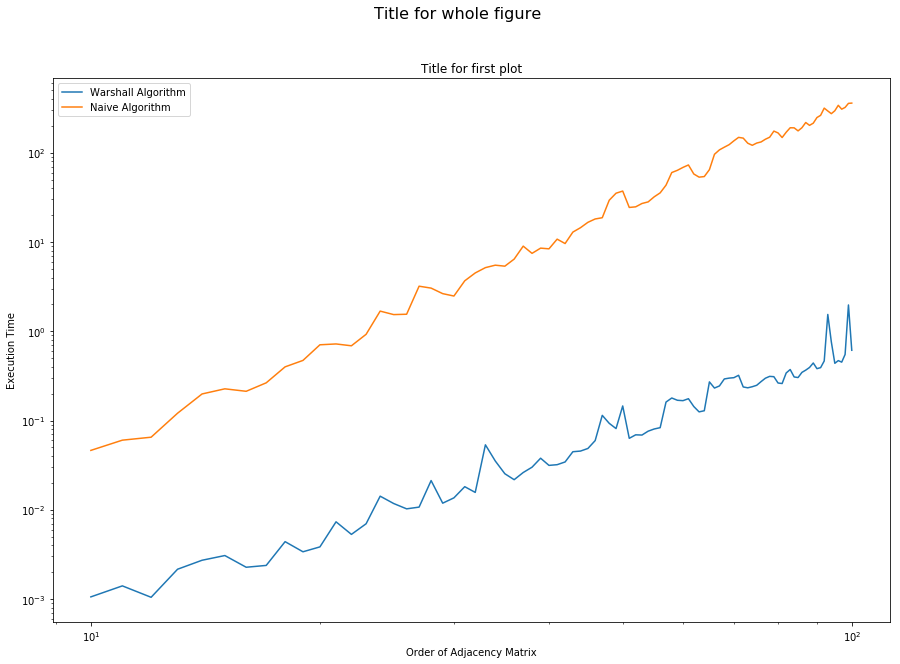

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Title for whole figure", fontsize=16)
ax.loglog(np.arange(10, 101), timeWarshall, label="Warshall Algorithm")
ax.loglog(np.arange(10, 101), timeNaive, label="Naive Algorithm")
ax.set_title("Title for first plot")
ax.set_xlabel("Order of Adjacency Matrix")
ax.set_ylabel("Execution Time")
plt.legend()
plt.show()

In [30]:
slope, intercept = np.polyfit(np.log(np.arange(mat_order_range[0], mat_order_range[1])), np.log(timeWarshall), 1)
print(np.ceil(slope) , intercept)

3.0 -14.065034293509324


In [26]:
slope, intercept = np.polyfit(np.log(np.arange(mat_order_range[0], mat_order_range[1])), np.log(timeNaive), 1)
print(slope, intercept)

4.008268241625256 -12.452782441288633
